In [1]:
import os
import pandas as pd
import logging

logging.basicConfig(filename='debug.log', level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')
def extract_labels(image_filename):
    try:
        basename = os.path.basename(image_filename)
        name, _ = os.path.splitext(basename)
        labels = name.split('_')
        return {
            'age': int(labels[0]),
            'gender': int(labels[1]),
            'race': int(labels[2]),
            'datetime': labels[3]
        }
    except Exception as e:
        logging.error(f"Error extracting labels from {image_filename}: {e}")
        return None

def process_image_folder(folder_path):
    
    data = []
    for subdir, _, files in os.walk(folder_path):
        logging.info(f"Processing directory: {subdir}")
        for file in files:
            if file.endswith(".jpg"):
                file_path = os.path.join(subdir, file)
                logging.info(f"Found image file: {file_path}")
                labels = extract_labels(file_path)
                if labels:
                    labels['image_path'] = file_path
                    data.append(labels)
                    logging.info(f"Extracted labels: {labels}")
                else:
                    logging.warning(f"Skipping file due to label extraction error: {file_path}")
            else:
                logging.warning(f"Skipping non-image file: {file}")

    if data:
        df = pd.DataFrame(data)
    else:
        df = pd.DataFrame(columns=['age', 'gender', 'race', 'datetime', 'image_path'])
    return df

main_folder = "data" 
dataframe = process_image_folder(main_folder)

output_csv = 'demographic_features.csv'
dataframe.to_csv(output_csv, index=False)
print(f"Data has been processed and saved to {output_csv}")

Data has been processed and saved to demographic_features.csv


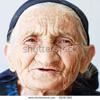

Age: 100, Gender: 1, Race: 0, DateTime: 20170110183726390


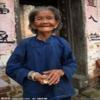

Age: 100, Gender: 1, Race: 2, DateTime: 20170105174847679


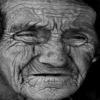

Age: 100, Gender: 1, Race: 2, DateTime: 20170110182836729


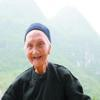

Age: 101, Gender: 1, Race: 2, DateTime: 20170105174739309


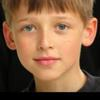

Age: 10, Gender: 0, Race: 0, DateTime: 20161220222308131


In [2]:
from IPython.display import Image, display

# Loading the CSV file
input_csv = 'demographic_features.csv'
df = pd.read_csv(input_csv)

def display_images_with_dataframe(df):
    for i, row in df.iterrows():
        display(Image(filename=row['image_path']))
        print(f"Age: {row['age']}, Gender: {row['gender']}, Race: {row['race']}, DateTime: {row['datetime']}")

display_images_with_dataframe(dataframe.head())


In [3]:
df.head()

,age,gender,race,datetime,image_path
0,100,1,0,20170110183726390,data\part1\100_1_0_20170110183726390.jpg
1,100,1,2,20170105174847679,data\part1\100_1_2_20170105174847679.jpg
2,100,1,2,20170110182836729,data\part1\100_1_2_20170110182836729.jpg
3,101,1,2,20170105174739309,data\part1\101_1_2_20170105174739309.jpg
4,10,0,0,20161220222308131,data\part1\10_0_0_20161220222308131.jpg
